In [41]:
import pandas as pd

In [42]:
# Creates a new DataFrame to contain the data from 2010 to 2022
data = {'Year': ['2010/12/31', '2011/6/30', '2011/12/31', '2012/06/30', '2012/12/31', '2013/06/30', '2013/12/31', '2014/06/30', '2014/12/31', '2015/06/30', '2015/12/31', '2016/06/30', '2016/12/31', '2017/06/30', '2017/12/31', '2018/06/30', '2018/12/31', '2019/06/30', '2019/12/31', '2020/06/30', '2020/12/31', '2021/06/30', '2021/12/31', '2022/06/30', '2022/12/31'],
        'Expenditures': [397000000000, 411000000000, 424000000000, 427000000000, 429000000000, 441000000000, 453000000000, 471000000000, 488000000000, 518000000000, 548000000000, 559500000000, 571000000000, 583500000000, 596000000000, 604000000000, 612000000000, 613500000000, 615000000000, 647000000000, 679000000000, 709500000000, 740000000000, 782000000000, 824000000000]}
df = pd.DataFrame(data)

In [43]:
# Convert the "Year" column to datetime objects, accommodating the "xxxx/xx/xx" format
df['Year'] = pd.to_datetime(df['Year'], format='%Y/%m/%d')

In [44]:
# Set "Year" as the index
df.set_index('Year', inplace=True)


In [45]:
# Resample the data to monthly frequency and use linear interpolation to fill in the values
df_monthly = df.resample('M').asfreq()  # Convert to monthly data
df_monthly.interpolate(method='linear', inplace=True)  # Perform linear interpolation

In [46]:
# Resample the data to monthly frequency and use linear interpolation to fill in the values
df_monthly = df.resample('M').asfreq()  # Convert to monthly data
df_monthly.interpolate(method='linear', inplace=True)  # Perform linear interpolation

In [47]:
# Store the monthly data in a csv file, named 'Expenditure_Monthly_data_2010-2022.csv'
df_monthly.reset_index().to_csv('Expenditure_Monthly_data_2010-2022.csv', index=False)

In [48]:
!pip install prophet

In [49]:
from prophet import Prophet
import matplotlib.pyplot as plt

In [50]:
#Setting the display size
pd.set_option('display.width', 300)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [51]:
# Columns Editing
df_monthly = df_monthly.reset_index()  # Reset the index
df_monthly = df_monthly.rename(columns={'Year':'ds','Expenditures':'y'}) # Rename columns to the ones that Prophet require.
# Note: Prophet requires the date to be named as 'ds', and targeted data as 'y'
print(df_monthly.head())

          ds             y
0 2010-12-31  3.970000e+11
1 2011-01-31  3.993333e+11
2 2011-02-28  4.016667e+11
3 2011-03-31  4.040000e+11
4 2011-04-30  4.063333e+11


In [52]:
# Modeling
model = Prophet()  # Create the model
model.fit(df_monthly)      # Train the model

01:40:58 - cmdstanpy - INFO - Chain [1] start processing
01:40:58 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
# Creating a new DataFrame for future dates, progressing by month instead of day, over the next 10 years.
# Since there are 12 months in a year, we use 12*10 to get the total number of months for 20 years.
future = model.make_future_dataframe(periods=12*10, freq='M')

In [54]:
# Forecasting
forecast = model.predict(future)

In [55]:
# Store the forecasted data into a new csv file named 'forecast_data_Medicaid_Expenditure.csv'
forecast_data= forecast.rename(columns = {'ds':'date'})
forecast_data.reset_index().to_csv('Expenditure_Monthly_data_Prediction_2010-2032.csv', index=False)

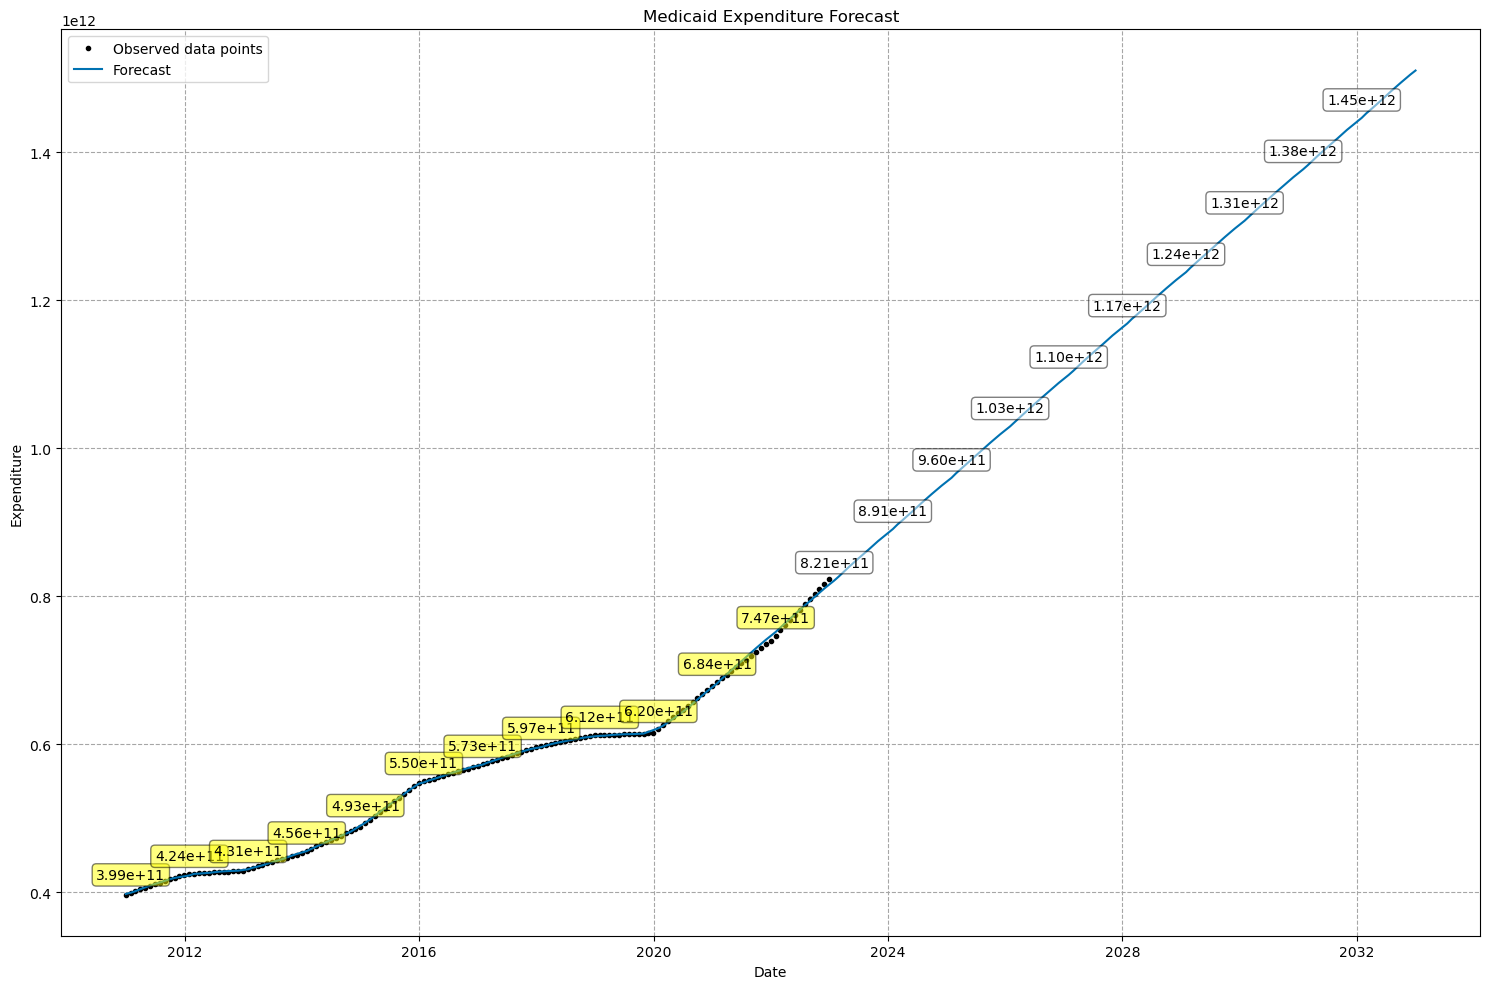

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot the historical data and forecast
plt.figure(figsize=(15, 10))
plt.plot(model.history['ds'], model.history['y'], 'k.', label='Observed data points')
plt.plot(forecast['ds'], forecast['yhat'], ls='-', c='#0072B2', label='Forecast')

# Beautify the plot with title and labels
plt.title('Medicaid Expenditure Forecast')
plt.xlabel('Date')
plt.ylabel('Expenditure')

# Add grid for better readability
plt.grid(True, which="both", ls="--", c='0.65')

# Adjust the layout to fit everything properly
plt.tight_layout()

# Add a legend
plt.legend()

# Annotate the values for each year in the historical data
for idx, date in enumerate(model.history['ds']):
    if date.month == 1:  # Check if the month is January
        value = model.history['y'].iloc[idx]
        plt.annotate(f"{value:.2e}", (date, value), textcoords="offset points", 
                     xytext=(0, 10), ha='center', fontsize=10, 
                     bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.5))

# Annotate forecasted values at the start of each year
for idx, date in enumerate(forecast['ds']):
    if date.year > model.history['ds'].dt.year.max() and date.month == 1:  # Annotate only future January points
        value = forecast['yhat'].iloc[idx]
        plt.annotate(f"{value:.2e}", (date, value), textcoords="offset points", 
                     xytext=(0, 10), ha='center', fontsize=10, 
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.5))

# Show the plot
plt.show()